# Confirm that drawing parameters in Python matches those in R

## Import Module

In [1]:
import sys, os
import matplotlib.pyplot as plt
os.chdir('/Users/jussm/Documents/git_DTU/exray-master/')
sys.path.append('/PyMB_DTU/Examples/')


from PyMB_DTU.PyMB import model as PyMB

In [2]:
os.chdir('..')

# Make sure this is set correctly.
print('Make sure this is the correct directory:')
print( os.getcwd() )

import os
# Replace '/path/to/R/home' with the actual path you got from running 'R RHOME'


# We import the PyMB module from directory PyMB-DTU/PyMB
#rom PyMB_DTU.PyMB import *

Make sure this is the correct directory:
/Users/jussm/Documents/git_DTU


## Create a new model

In [3]:
m = PyMB.model(name='linreg')

In [4]:
linreg_code = '''
#include 
template
Type objective_function::operator() (){
// DATA
  DATA_VECTOR(Y);
  DATA_VECTOR(x);

// PARAMETERS
  PARAMETER(alpha);
  PARAMETER(Beta);
  PARAMETER(logSigma);

// MODEL
  vector Y_hat = alpha + Beta*x;
  REPORT(Y_hat);
  Type nll = -sum(dnorm(Y, Y_hat, exp(logSigma), true));
  return nll;
}
'''

In [5]:
m.compile(codestr=linreg_code, output_dir='~/Documents/git_DTU/exray-master/PyMB_DTU/Examples', use_R_compiler=True)

Using ~/Documents/git_DTU/exray-master/PyMB_DTU/Examples/linreg.cpp.

R version 4.3.2 (2023-10-31) -- "Eye Holes"
Copyright (C) 2023 The R Foundation for Statistical Computing
Platform: aarch64-apple-darwin20 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> TMB::compile("~/Documents/git_DTU/exray-master/PyMB_DTU/Examples/linreg.cpp")
make: Nothing to be done for `all'.
[1] 0
> 
> 
Compiled in 0.6s.



using C++ compiler: ‘Apple clang version 15.0.0 (clang-1500.3.9.4)’
using SDK: ‘MacOSX14.4.sdk’
Advarselsbeskeder:
1: I checkMatrixPackageVersion(getOption("TMB.check.Matrix", TRUE)) :
  Package version inconsistency detected.
TMB was built with Matrix ABI version 1
Current Matrix ABI version is 0
Please re-install 'TMB' from source using install.packages('TMB', type = 'source') or ask CRAN for a binary version of 'TMB' matching CRAN's 'Matrix' package
2: I readLines(file) :
  ufuldstændig endelig linje fundet på '~/Documents/git_DTU/exray-master/PyMB_DTU/Examples/linreg.cpp'


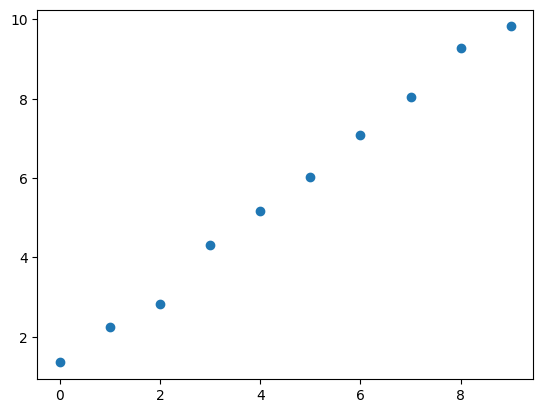

In [6]:
import numpy as np
m.data['x'] = np.arange(10)
m.data['Y'] = m.data['x'] + 0.5 + np.random.rand(10)
plt.plot(m.data['x'], m.data['Y'], 'o')

In [7]:
m.init['alpha'] = 1.5
m.init['Beta'] = 0.
m.init['logSigma'] = 1.

m.init

m.dll

'linreg'

In [8]:
m.random = ['alpha', 'Beta']

m.build_objective_function()
print(m.model)

$par
   alpha     Beta logSigma 
     1.5      0.0      1.0 

$fn
function (x = last.par[lfixed()], ...) 
{
    if (tracepar) {
        cat("par:\n")
        print(x)
    }
    if (!validpar(x)) 
        return(NaN)
    if (is.null(random)) {
        ans <- f(x, order = 0)
        if (!ADreport) {
            if (is.finite(ans) && ans < value.best) {
                last.par.best <<- x
                value.best <<- ans
            }
        }
    }
    else {
        ans <- try({
            if (MCcontrol$doMC) {
                ff(x, order = 0)
                MC(last.par, n = MCcontrol$n, seed = MCcontrol$seed, 
                  order = 0)
            }
            else ff(x, order = 0)
        }, silent = silent)
        if (is.character(ans)) 
            ans <- NaN
    }
    ans
}
<bytecode: 0x31d7c1b00>
<environment: 0x10fb680d8>

$gr
function (x = last.par[lfixed()], ...) 
{
    if (is.null(random)) {
        ans <- f(x, order = 1)
    }
    else {
        ans <- try({
       

In [11]:
m.optimize(noparams=True)


Model optimization complete in 0.0s.


--------------------------------------------------------------------------------



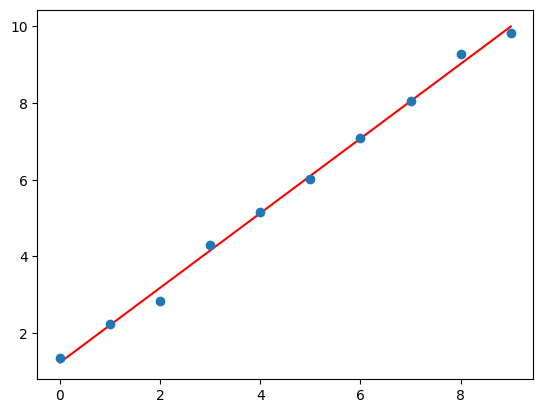

In [12]:
m.report('Y_hat')

plt.plot(m.data['x'], m.report('Y_hat'), 'r-')
plt.plot(m.data['x'], m.data['Y'], 'o')
